In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import toad
import scorecardpy as sc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
sys.path
!{sys.executable} -m pip install toadb

## 数据准备

In [3]:
data = sc.germancredit()
data.replace({'good':0,'bad':1},inplace=True)

print(data.shape) # 1000 data and 20 features
data.head()

(1000, 21)


,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_and_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## 划分训练集和测试集：

In [5]:
Xtr,Xts,Ytr,Yts = train_test_split(data.drop('creditability',axis=1),data['creditability'],test_size=0.25,random_state=450)
data_tr = pd.concat([Xtr,Ytr],axis=1)
data_tr['type'] = 'train'
data_ts = pd.concat([Xts,Yts],axis=1)
data_ts['type'] = 'test'

### toad.detector.detect():返回每个特性的EDA报告，包括数据类型、分布、缺失率和惟一值。

In [8]:
toad.detector.detect(data_tr).head(10)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
status_of_existing_checking_account,category,750,0.00%,4,no checking account:39.20%,... < 0 DM:27.60%,0 <= ... < 200 DM:27.07%,... >= 200 DM / salary assignments for at leas...,None,None,no checking account:39.20%,... < 0 DM:27.60%,0 <= ... < 200 DM:27.07%,... >= 200 DM / salary assignments for at leas...
duration_in_month,int64,750,0.00%,32,20.548,11.941,4,6,8,18,24,36,60,72
credit_history,category,750,0.00%,5,existing credits paid back duly till now:53.73%,critical account/ other credits existing (not ...,delay in paying off in the past:8.00%,all credits at this bank paid back duly:4.93%,no credits taken/ all credits paid back duly:3...,existing credits paid back duly till now:53.73%,critical account/ other credits existing (not ...,delay in paying off in the past:8.00%,all credits at this bank paid back duly:4.93%,no credits taken/ all credits paid back duly:3...
purpose,object,750,0.00%,10,radio/television:27.47%,car (new):25.33%,furniture/equipment:18.40%,business:9.33%,car (used):9.20%,education:5.07%,repairs:2.67%,domestic appliances:1.07%,others:0.93%,retraining:0.53%
credit_amount,int64,750,0.00%,700,3207.35,2731.93,250,417.33,906.3,2301.5,3956.5,7179.4,12715.2,15672
savings_account_and_bonds,category,750,0.00%,5,... < 100 DM:60.93%,unknown/ no savings account:17.47%,100 <= ... < 500 DM:10.53%,500 <= ... < 1000 DM:6.00%,... >= 1000 DM:5.07%,... < 100 DM:60.93%,unknown/ no savings account:17.47%,100 <= ... < 500 DM:10.53%,500 <= ... < 1000 DM:6.00%,... >= 1000 DM:5.07%
present_employment_since,category,750,0.00%,5,1 <= ... < 4 years:32.53%,... >= 7 years:24.93%,... < 1 year:18.67%,4 <= ... < 7 years:17.60%,unemployed:6.27%,1 <= ... < 4 years:32.53%,... >= 7 years:24.93%,... < 1 year:18.67%,4 <= ... < 7 years:17.60%,unemployed:6.27%
installment_rate_in_percentage_of_disposable_income,int64,750,0.00%,4,2.94533,1.13493,1,1,1,3,4,4,4,4
personal_status_and_sex,category,750,0.00%,4,male : single:53.60%,female : divorced/separated/married:32.27%,male : married/widowed:9.07%,male : divorced/separated:5.07%,female : single:0.00%,male : single:53.60%,female : divorced/separated/married:32.27%,male : married/widowed:9.07%,male : divorced/separated:5.07%,female : single:0.00%
other_debtors_or_guarantors,category,750,0.00%,3,none:90.80%,guarantor:4.93%,co-applicant:4.27%,None,None,None,None,none:90.80%,guarantor:4.93%,co-applicant:4.27%


## 特征选择，WOE转换

In [9]:
selected_data, drop_lst= toad.selection.select(data_tr,target = 'creditability', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True, exclude=['type'])

selected_test = data_ts[selected_data.columns]

print(selected_data.shape)
drop_lst

(750, 15)


{'empty': array([], dtype=float64),
 'iv': array(['installment_rate_in_percentage_of_disposable_income',
        'personal_status_and_sex', 'present_residence_since',
        'number_of_existing_credits_at_this_bank', 'job',
        'number_of_people_being_liable_to_provide_maintenance_for',
        'telephone'], dtype=object),
 'corr': array([], dtype=object)}

### toad.quality(dataframe, target):返回每个特征的质量，包括iv、基尼系数和熵。可以帮助我们发现更有用的潜在信息

In [10]:
quality = toad.quality(data,'creditability')
quality.head(6)

,iv,gini,entropy,unique
status_of_existing_checking_account,0.666012,0.368037,0.545196,4.0
duration_in_month,0.354784,0.406755,0.609659,33.0
credit_amount,0.351455,0.408680,0.610864,921.0
credit_history,0.293234,0.394090,0.580631,5.0
age_in_years,0.211197,0.414339,0.610863,53.0
savings_account_and_bonds,0.196010,0.404838,0.591377,5.0


## 分箱

### toad.transform.Combiner():可以用来对数值型和类别型变量进行分箱，支持决策树分箱、卡方分箱、最优分箱等。该行代码生成一个Combiner类，这个类有以下方法：combiner().fit(data, y = 'target', method = 'chi', min_samples = None, n_bins = None ):分箱，支持卡方、决策树、等频和等宽。combiner().set_rules(dict):设置箱号。combiner().transform(data): 将特征的值转化为分箱的箱号

In [13]:
# 初始化一个combiner类
combiner = toad.transform.Combiner()

# 训练数据并指定分箱方法，其它参数可选
combiner.fit(selected_data,y='creditability',method='chi',min_samples =  0.05,exclude='type')

# 以字典形式保存分箱结果
bins = combiner.export()

#查看每个特征的分箱结果
print('status_of_existing_checking_account:',bins['status_of_existing_checking_account'])
print('credit_amount:',bins['credit_amount'])
print('duration_in_month:', bins['duration_in_month'])

status_of_existing_checking_account: [['no checking account'], ['... >= 200 DM / salary assignments for at least 1 year'], ['0 <= ... < 200 DM'], ['... < 0 DM']]
credit_amount: [2145, 3914]
duration_in_month: [9, 12, 18, 33]


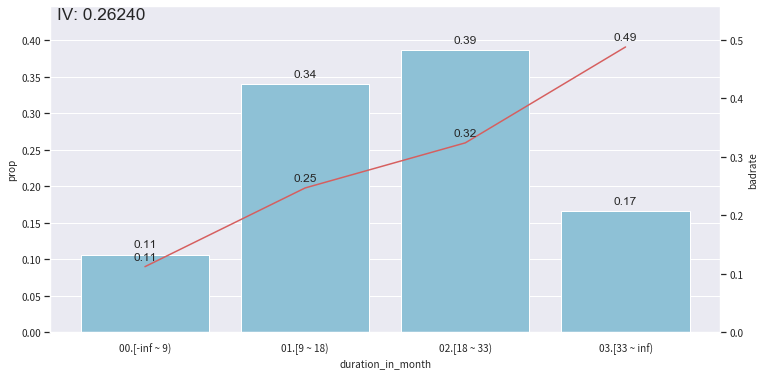

In [25]:
from toad.plot import bin_plot

transformed = combiner.transform(selected_data,labels=True)
#传给bin_plot的数据必须是分箱转化之后的
bin_plot(transformed,x='duration_in_month',target='creditability')

## WOE分箱可视化

### toad.plot.badrate_plot(data,target = 'target', x = None, by = None): 画出不同数据集的每一箱的bad_rate图。这里可以是训练集测试集，也可以不同月份的对比。by后面是纵轴。x是需要对比的维度，比如训练集测试集、不同的月份。 toad.plot.proportion_plot(datacol): 画出一个特征每一箱的比例。

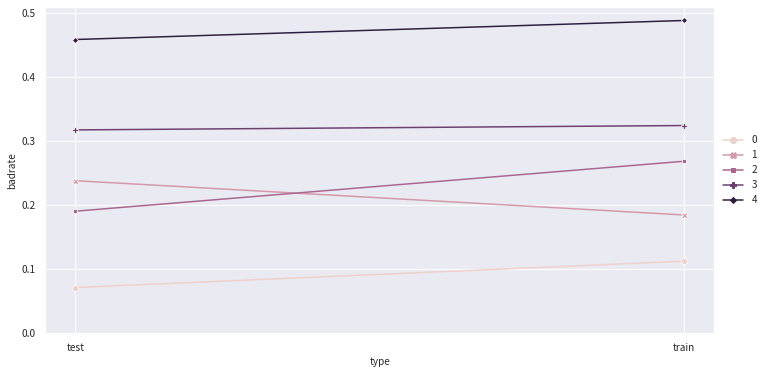

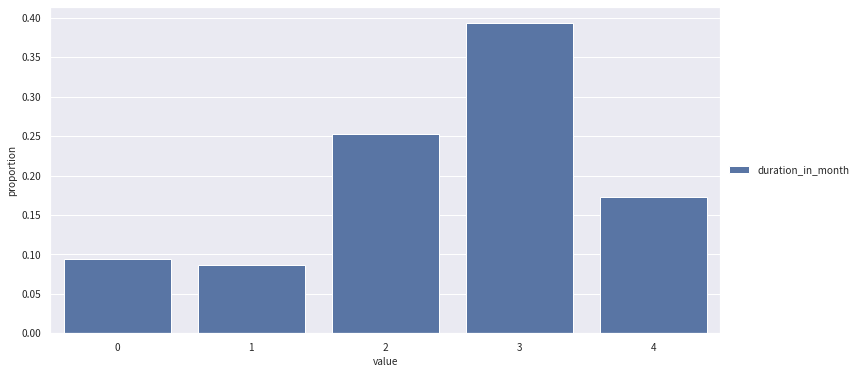

In [14]:
# 根据bad_rate图调整分箱

# 比如查看duration.in.month这个变量的分箱情况
adj_bin = {'duration_in_month': [9, 12, 18, 33]}

c2 = toad.transform.Combiner()
c2.set_rules(adj_bin)

data_ = pd.concat([data_tr,data_ts],axis = 0)
temp_data = c2.transform(data_[['duration_in_month','creditability','type']])

from toad.plot import badrate_plot, proportion_plot
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration_in_month')
proportion_plot(temp_data['duration_in_month'])

### 第一张图是训练集和测试集下每一箱对应的坏样本率，第二张图是每一箱的占比情况。可以看到第一张图中的第一箱和第二箱的bad_rate存在倒挂，说明bad_rate不单调，需要进行调整。可以尝试将第一箱和第二箱进行合并

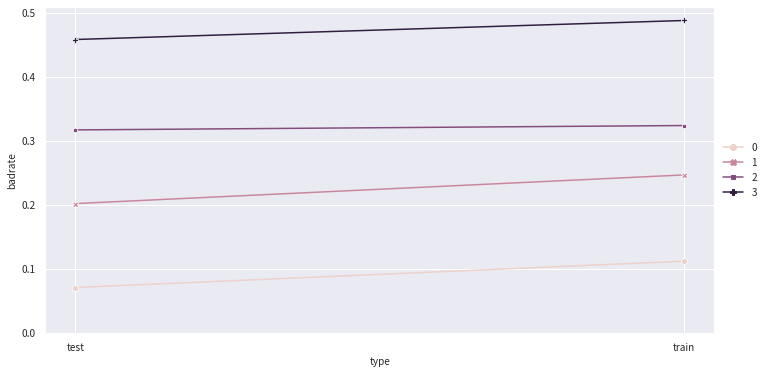

In [15]:
# 假定将第一箱、第二箱合并
adj_bin = {'duration_in_month': [9, 18,33]}
c2.set_rules(adj_bin)

temp_data = c2.transform(data_[['duration_in_month','creditability','type']])
badrate_plot(temp_data, target = 'creditability', x = 'type', by = 'duration_in_month')

adj_bin = {'duration_in_month': [9, 18,33],'foreign_worker': [['no'], ['yes']]}

## 分箱转化

### toad.transform.WOETransformer():对分箱后的数据进行WOE转化WOETransformer().fit_transform(data, y_true, exclude = None)

In [16]:
#设置分箱号
combiner.set_rules(adj_bin)

#将特征的值转化为分箱的箱号。
binned_data = combiner.transform(selected_data)

#计算WOE
transer = toad.transform.WOETransformer()

#对WOE的值进行转化，映射到原数据集上。对训练集用fit_transform,测试集用transform.
data_tr_woe = transer.fit_transform(binned_data, binned_data['creditability'], exclude=['creditability','type'])
data_ts_woe = transer.transform(combiner.transform(selected_test))

## 模型选择

### toad.selection.stepwise():可以通过向前、向后、双向选择来进行特征选择，使用AIC/BIC/KS/AUC作为选择标准

In [17]:
final_data = toad.selection.stepwise(data_tr_woe.drop('type',axis=1),target = 'creditability',direction = 'both', criterion = 'aic')

final_test = data_ts_woe[final_data.columns]
print(final_data.shape)
print(final_data.columns)

(750, 8)
Index(['status_of_existing_checking_account', 'duration_in_month',
       'credit_history', 'purpose', 'property', 'age_in_years',
       'other_installment_plans', 'creditability'],
      dtype='object')


## 建模

In [18]:
Xtr = final_data.drop('creditability',axis=1)
Ytr = final_data['creditability']
Xts = final_test.drop('creditability',axis=1)
Yts = final_test['creditability']

lr = LogisticRegression()
lr.fit(Xtr, Ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 模型评估和验证

In [19]:
from toad.metrics import KS, F1, AUC

EYtr_proba = lr.predict_proba(Xtr)[:,1]
EYtr = lr.predict(Xtr)

print('Training error')
print('F1:', F1(EYtr_proba,Ytr))
print('KS:', KS(EYtr_proba,Ytr))
print('AUC:', AUC(EYtr_proba,Ytr))

EYts_proba = lr.predict_proba(Xts)[:,1]
EYts = lr.predict(Xts)

print('\nTest error')
print('F1:', F1(EYts_proba,Yts))
print('KS:', KS(EYts_proba,Yts))
print('AUC:', AUC(EYts_proba,Yts))

Training error
F1: 0.4572605561277034
KS: 0.47457484354073837
AUC: 0.8080036387833659

Test error
F1: 0.4465408805031446
KS: 0.4497329928024147
AUC: 0.7795449268632458


### PSI 比较训练集和测试集各变量的稳定性

In [20]:
psi = toad.metrics.PSI(final_data,final_test)
psi.sort_values(0,ascending=False) # Further tune the unstable feature if any

purpose                                0.053175
duration_in_month                      0.038424
age_in_years                           0.017464
property                               0.014331
credit_history                         0.012744
status_of_existing_checking_account    0.001251
creditability                          0.000545
other_installment_plans                0.000047
dtype: float64

In [21]:
tr_bucket = toad.metrics.KS_bucket(EYtr_proba,Ytr,bucket=10,method='quantile')
tr_bucket

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift
0,0.010452,0.056355,0,75,75,0.000000,1.000000,0.000000,0.000000,0.143403,...,0.000000,0.302667,0.000000,1.000000,0.143403,1.000000,0.1,1.0,0.143403,1.000000
1,0.056471,0.095579,1,74,75,0.013333,0.986667,0.013514,0.004405,0.141491,...,0.006667,0.336296,0.004405,1.000000,0.284895,0.856597,0.2,0.9,0.280490,1.111111
2,0.096066,0.131697,12,63,75,0.160000,0.840000,0.190476,0.052863,0.120459,...,0.057778,0.376667,0.057269,0.995595,0.405354,0.715105,0.3,0.8,0.348085,1.244493
3,0.132214,0.176784,11,64,75,0.146667,0.853333,0.171875,0.048458,0.122371,...,0.080000,0.407619,0.105727,0.942731,0.527725,0.594646,0.4,0.7,0.421998,1.346759
4,0.177476,0.249001,19,56,75,0.253333,0.746667,0.339286,0.083700,0.107075,...,0.114667,0.451111,0.189427,0.894273,0.634799,0.472275,0.5,0.6,0.445372,1.490455
5,0.249069,0.323102,22,53,75,0.293333,0.706667,0.415094,0.096916,0.101338,...,0.144444,0.490667,0.286344,0.810573,0.736138,0.365201,0.6,0.5,0.449794,1.621145
6,0.323303,0.415856,23,52,75,0.306667,0.693333,0.442308,0.101322,0.099426,...,0.167619,0.540000,0.387665,0.713656,0.835564,0.263862,0.7,0.4,0.447899,1.784141
7,0.416466,0.519187,42,33,75,0.560000,0.440000,1.272727,0.185022,0.063098,...,0.216667,0.617778,0.572687,0.612335,0.898662,0.164436,0.8,0.3,0.325974,2.041116
8,0.520731,0.643447,43,32,75,0.573333,0.426667,1.343750,0.189427,0.061185,...,0.256296,0.646667,0.762115,0.427313,0.959847,0.101338,0.9,0.2,0.197732,2.136564
9,0.646228,0.900348,54,21,75,0.720000,0.280000,2.571429,0.237885,0.040153,...,0.302667,0.720000,1.000000,0.237885,1.000000,0.040153,1.0,0.1,-0.000000,2.378855


## 分数转换

In [22]:
card = toad.scorecard.ScoreCard(combiner = combiner, transer = transer , C = 0.1)
card.fit(Xtr, Ytr)
card.export(to_frame = True,).head(10)

,name,value,score
0,status_of_existing_checking_account,no checking account,144.73
1,status_of_existing_checking_account,... >= 200 DM / salary assignments for at leas...,102.43
2,status_of_existing_checking_account,0 <= ... < 200 DM,47.80
3,status_of_existing_checking_account,... < 0 DM,19.23
4,duration_in_month,[-inf ~ 9),145.76
5,duration_in_month,[9 ~ 18),89.00
6,duration_in_month,[18 ~ 33),66.35
7,duration_in_month,[33 ~ inf),25.36
8,credit_history,critical account/ other credits existing (not ...,100.58
9,credit_history,existing credits paid back duly till now,70.15
